In [7]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import linalg as la
from sympy import subfactorial as sub
from sympy import integrate as integ
from sympy import exp
from sympy.abc import x
import sympy as sy
import math


In [4]:
#problem 1
def prob1(A):
    singvals= la.svdvals(A)
    singmax = singvals.max()
    singmin = singvals.min()
    if singmin == 0:
        return np.inf
    return (singmax/singmin)

    

In [5]:
A = np.array([[1, 0, 3], [0, 6,1]])
print(prob1(A))
print(np.linalg.cond(A))

1.96470087821
1.96470087821


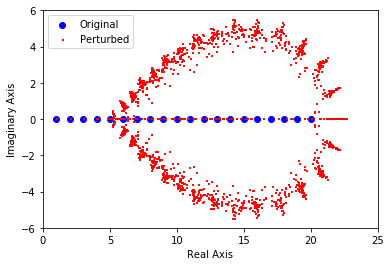

In [8]:
#problem 2
w_roots = np.arange(1,21)
x, i = sy.symbols('x i')
w = sy.poly_from_expr(sy.product(x-i, (i, 1, 20)))[0]
w_coeffs = np.array(w.all_coeffs())
plt.scatter(w_roots.real,w_roots.imag,marker='o',color='blue')
k_abs = 0
k_rev = 0
for i in range(100):
    new_coeffs = w_coeffs*np.random.normal(1,1e-10,len(w_coeffs))
    new_roots = np.roots(np.poly1d(new_coeffs))
    h = w_coeffs-new_coeffs
    w_roots = np.sort(w_roots)
    new_roots = np.sort(new_roots)
    plt.scatter(new_roots.real,new_roots.imag,marker=',',color='r',s=1)
    k = la.norm(new_roots - w_roots, np.inf) / la.norm(h, np.inf)
    k_abs += k
    k_rev += k * la.norm(w_coeffs, np.inf) / la.norm(w_roots, np.inf)
plt.legend(['Original','Perturbed'])
plt.xlabel('Real Axis')
plt.ylabel('Imaginary Axis')
plt.axis([0,25,-6,6])
plt.show()


In [ ]:
def prob_3(A):
    reals = np.random.normal(0, 1e-10, A.shape)
    imags = np.random.normal(0, 1e-10, A.shape)
    H = reals + 1j*imags
    eigs_A = la.eigvals(A)
    eigs_AH = la.eigvals(A+H)
    k_abs = la.norm(eigs_A-eigs_AH)/la.norm(H,ord=2)
    k_rev = (la.norm(A,ord=2)/la.norm(eigs_A))*k_abs
    return k_abs,k_rev

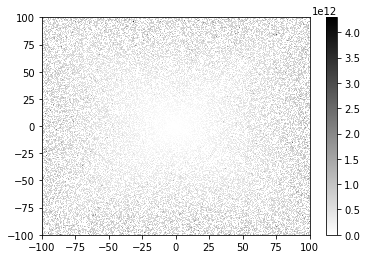

In [10]:
#problem 4
X = np.linspace(-100,100,500)
Y = np.linspace(-100,100,500)
Z = np.zeros((len(X),len(Y)))
for i in range(len(X)): 
    for j in range(len(Y)): 
        Z[i,j] = problem_3(np.array([[1,X[i]],[Y[j],1]]))[1]
plt.pcolormesh(X,Y,Z,cmap='gray_r')
plt.colorbar()
plt.show()


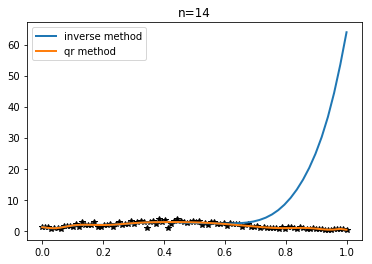

(152.14373083729365, 4.568370941902039)

In [12]:
def prob_5(n):
    xk, yk = np.load('stability_data.npy').T
    A = np.vander(xk, n+1)
    cinv = la.inv(A.T@A)@A.T@yk
    Q,R = la.qr(A,mode='economic')
    cqr = la.solve(R,Q.T@yk)
    dom = np.linspace(np.amin(xk),np.amax(xk),50)
    plt.plot(xk,yk,'k*')
    plt.plot(dom,np.polyval(cinv,dom),label='inverse method',linewidth=2)
    plt.plot(dom,np.polyval(cqr,dom),label='qr method',linewidth=2)
    plt.legend(loc='upper left')
    plt.title("n={}".format(n))
    plt.show()
    err1 = la.norm(A@cinv-yk,ord=2)
    err2 = la.norm(A@cqr-yk,ord=2)
    return err1, err2
prob_5(14)

[  1.41635511e-14   6.00215780e-11   5.85455510e-05   2.30441810e+03
   8.53506428e+09   1.80724401e+17   5.76715154e+24   3.45585761e+32
   1.16529461e+41   4.23108737e+49]


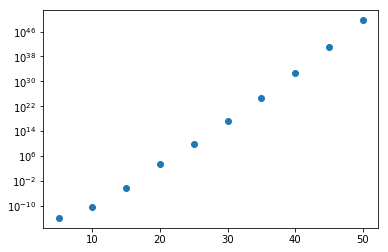

In [13]:
def integrate(x,n):
    return (x**n)*sy.exp(x-1)


err = np.zeros(10)
for i in range(10):
    n = 5*(i+1)
    f = lambda x: integrate(x,n)
    x = sy.Symbol('x')
    I_1 = sy.integrate((x**n)*sy.exp(x-1), (x,0,1))
    I_2 = float(((-1)**n)*sy.subfactorial(n)+((-1)**(n+1))*(sy.factorial(n)/sy.exp(1)))
    err[i] = float(abs((I_2-I_1))/abs(I_1))
print(err)
x = np.linspace(5,50,10)
plt.plot(x,err,marker='o',lw=0)
plt.yscale('log')
plt.show()